In [140]:
import re
import subprocess
import json
import matplotlib.pyplot as plt
import numpy

In [110]:
def parse(file):
    reg = re.search('([0-9,]+) bytes allocated', file).group(1)
    return int(reg.replace(',', ''))

In [113]:
values = {'lexp': [], 'lexm': [], 'fill':[]}
for fun in ['lexp', 'lexm', 'fill']:
    minn = 5
    maxn = 50
    stepn = 10
    for n in range(minn, maxn, stepn):
        mine = n-1
        maxe = int(n*(n-1)/2)
        stepe = max(int((maxe-mine)/5), 1)
        for e in range(mine, maxe, stepe):
            out = subprocess.run(["valgrind", "./space", fun, str(n), str(e)], stderr=subprocess.PIPE).stderr
            values[fun].append({'n':n, 'e':e, 'heap': parse(out.decode("utf-8"))})
print(values)

{'lexp': [{'n': 5, 'e': 4, 'heap': 75556}, {'n': 5, 'e': 5, 'heap': 75836}, {'n': 5, 'e': 6, 'heap': 76092}, {'n': 5, 'e': 7, 'heap': 76348}, {'n': 5, 'e': 8, 'heap': 76684}, {'n': 5, 'e': 9, 'heap': 76940}, {'n': 15, 'e': 14, 'heap': 79844}, {'n': 15, 'e': 32, 'heap': 84556}, {'n': 15, 'e': 50, 'heap': 89324}, {'n': 15, 'e': 68, 'heap': 94092}, {'n': 15, 'e': 86, 'heap': 99132}, {'n': 15, 'e': 104, 'heap': 104548}, {'n': 25, 'e': 24, 'heap': 84396}, {'n': 25, 'e': 79, 'heap': 98524}, {'n': 25, 'e': 134, 'heap': 113172}, {'n': 25, 'e': 189, 'heap': 127516}, {'n': 25, 'e': 244, 'heap': 143164}, {'n': 25, 'e': 299, 'heap': 160396}, {'n': 35, 'e': 34, 'heap': 88356}, {'n': 35, 'e': 146, 'heap': 117780}, {'n': 35, 'e': 258, 'heap': 147476}, {'n': 35, 'e': 370, 'heap': 176876}, {'n': 35, 'e': 482, 'heap': 207676}, {'n': 35, 'e': 594, 'heap': 242436}, {'n': 45, 'e': 44, 'heap': 92652}, {'n': 45, 'e': 233, 'heap': 142596}, {'n': 45, 'e': 422, 'heap': 192084}, {'n': 45, 'e': 611, 'heap': 24181

In [131]:
with open("valgrind_results.json") as f:
    alldata = json.load(f)

(9, 10, 11, 12, 13, 14, 29, 49, 47, 69, 65, 89, 83, 104, 101, 119, 159, 181, 214, 278, 269, 293, 324, 405, 467, 517, 656, 629, 845, 1034) (75556, 75836, 76092, 76348, 76684, 76940, 79844, 84396, 84556, 88356, 89324, 92652, 94092, 98524, 99132, 104548, 113172, 117780, 127516, 142596, 143164, 147476, 160396, 176876, 192084, 207676, 241812, 242436, 292916, 355764)


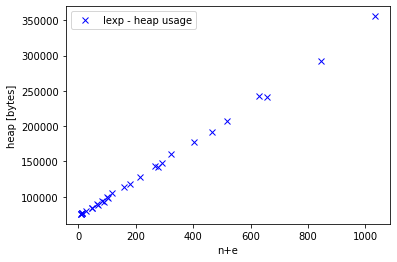

In [167]:
x = [];
y = [];
data = alldata['lexp']
for point in data:
    x.append(point['n']+point['e'])
    y.append(point['heap'])

x, y = zip(*sorted(zip(x, y), key = lambda x:x[1]))
print(x,y)
    
plt.plot(x, y,'bx')
plt.xlabel('n+e')
plt.ylabel('heap [bytes]')
plt.legend(["lexp - heap usage"])
plt.gcf().subplots_adjust(left=0.15)
plt.savefig('lexp.pdf')

(20, 25, 30, 35, 40, 45, 210, 480, 600, 750, 1020, 1190, 1290, 1560, 1980, 1975, 3350, 4725, 5110, 6100, 7475, 9030, 10485, 12950, 16870, 18990, 20790, 27495, 36000, 44505) (79228, 80184, 80964, 81940, 82992, 83928, 107120, 143880, 157340, 185084, 217548, 227940, 252736, 285764, 325712, 336528, 501616, 660444, 719996, 821244, 968596, 1170976, 1389780, 1602108, 2025584, 2304256, 2445116, 3203068, 4111220, 5022432)


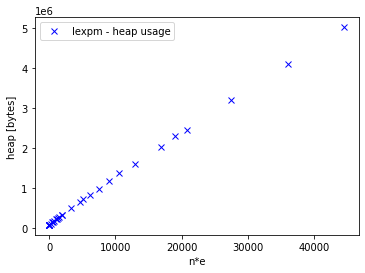

In [169]:
x = [];
y = [];
data = alldata['lexm']
for point in data:
    x.append(point['n']*point['e'])
    y.append(point['heap'])

x, y = zip(*sorted(zip(x, y), key = lambda x:x[1]))
print(x,y)
    
plt.plot(x, y,'bx')
plt.xlabel('n*e')
plt.ylabel('heap [bytes]')
plt.legend(["lexpm - heap usage"])
plt.gcf().subplots_adjust(left=0.15)
plt.savefig('lexm.pdf')

(9, 10, 11, 12, 13, 14, 29, 47, 65, 83, 49, 101, 119, 104, 69, 89, 159, 214, 181, 269, 324, 293, 278, 405, 517, 467, 629, 656, 845, 1034) (76808, 77104, 77504, 77864, 78192, 78536, 87488, 93464, 100264, 106784, 107992, 112832, 118856, 123896, 133904, 141824, 143776, 161528, 166392, 180344, 199176, 206712, 220104, 242936, 281208, 290664, 319496, 351152, 415496, 479816)


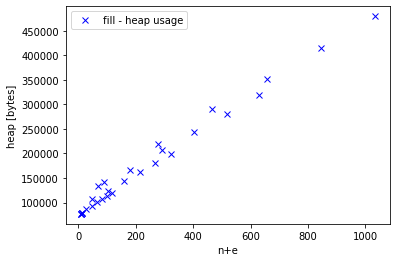

In [168]:
x = [];
y = [];
data = alldata['fill']
for point in data:
    x.append(point['n']+point['e'])
    y.append(point['heap'])

x, y = zip(*sorted(zip(x, y), key = lambda x:x[1]))
print(x,y)
    
plt.plot(x, y,'bx')
plt.xlabel('n+e')
plt.ylabel('heap [bytes]')
plt.legend(["fill - heap usage"])
plt.gcf().subplots_adjust(left=0.15)
plt.savefig('fill.pdf')